# Beispiel 1

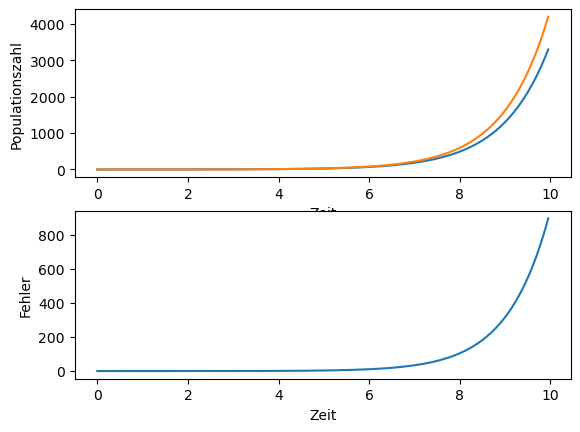

In [1]:
import numpy as np
import matplotlib.pyplot as plt

b=2; d=1; N0 = 0.2;

tStop = 10.; dt = 0.05
time = np.arange(0., tStop, dt);
N=np.zeros(len(time));
N[0]=N0;

# Explicit Euler Scheme
for i in range(1,len(time)):
    N[i]=N[i-1]+(b*N[i-1]-d*N[i-1])*dt;

# Analytical solution
N_ana = N0*np.exp((b-d)*time);

# error
error = np.abs(N-N_ana);

# Plot results
fig = plt.figure()

# Plot population size as a function of time
ax1 = fig.add_subplot(211)
ax1.plot(time, N)
ax1.plot(time,N_ana)
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Populationszahl')

# Plot error against analytical solution
ax2 = fig.add_subplot(212)
ax2.plot(time,error)
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Fehler')

plt.show()


# Beispiel 2

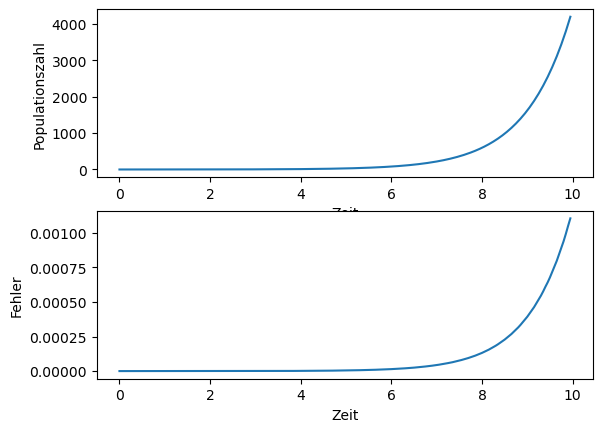

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    N = y      # unpack current values of y
    b, d = params  # unpack parameters
    deriv = (b-d)*N
    return deriv

# Parameters
b=2; d=1;

# Initial values
y0 = 0.2;

# Bundle parameters for ODE solver
params = [b,d]

# Make time array for solution
tStop = 10.
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure()

# Plot population size as a function of time
ax1 = fig.add_subplot(211)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Populationszahl')

# Plot error against analytical solution
ax2 = fig.add_subplot(212)
ax2.plot(t, abs(psoln[:,0]- y0*np.exp((b-d)*t)))
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Fehler')

plt.show()


# Beispiel 3

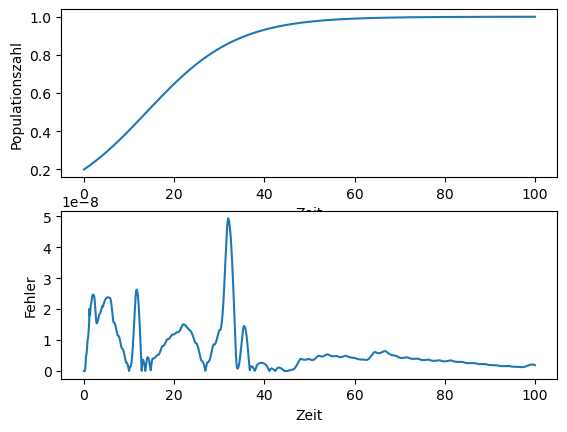

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    N = y      # unpack current values of y
    r, K = params  # unpack parameters
    deriv = r*N*(1-N/K)
    return deriv

# Parameters
r=0.1; K=1;

# Initial values
y0 = 0.2;

# Bundle parameters for ODE solver
params = [r,K]

# Make time array for solution
tStop = 100.
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure()

# Plot population size as a function of time
ax1 = fig.add_subplot(211)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Populationszahl')

# Plot error against analytical solution
ax2 = fig.add_subplot(212)
ax2.plot(t, abs(psoln[:,0]- (y0*K*np.exp(r*t)) / (K + y0*(np.exp(r*t) - 1))))
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Fehler')

plt.show()


# Beispiel 4

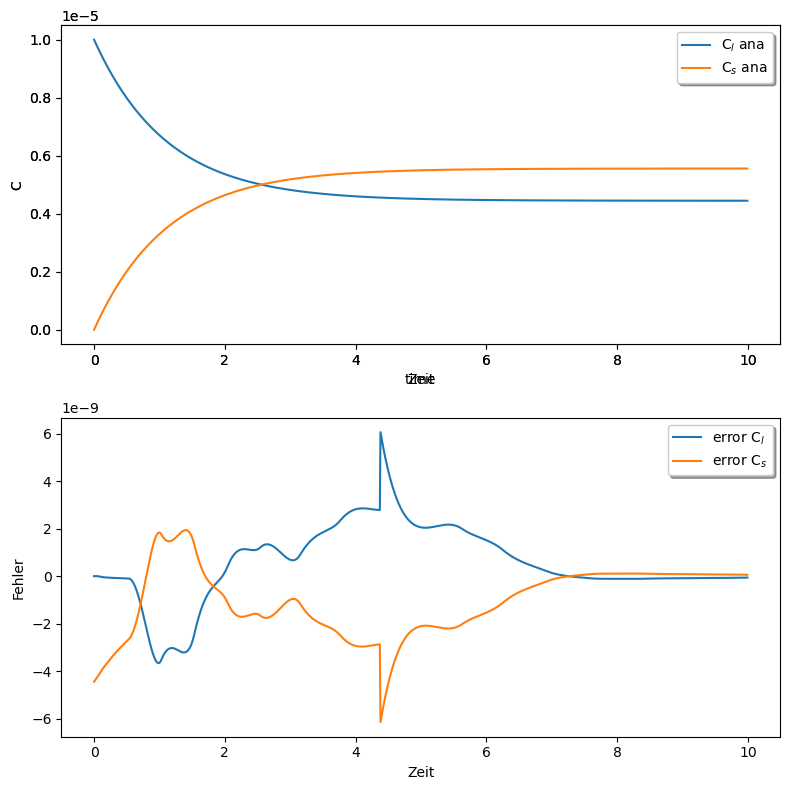

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    Cl, Cs = y      # unpack current values of y
    kf, kb, rhob, theta = params  # unpack parameters
    derivs = [-kf*Cl + rhob/theta*kb*Cs,      # list of dy/dt=f functions
             kf*theta/rhob*Cl - kb*Cs]
    return derivs

# Parameters
kf=0.5; kb=0.4; rhob=1.5; theta=0.3;

# Initial values
Cl0 = 1e-5;     
Cs0 = 1e-9;

# Bundle parameters for ODE solver
params = [kf, kb, rhob, theta]
y0 = [Cl0, Cs0]

# Make time array for solution
tStop = 10.
tInc = 0.01
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))
# Analytical solution
Cl_ana = (Cl0*kb+Cs0*kb*rhob/theta) / (kf+kb) + ( (Cl0*kf - Cs0*kb*rhob/theta)/(kf+kb) )*np.exp(-(kf+kb)*t);
Cs_ana = (Cl0*kf*theta/rhob+Cs0*kf) / (kf+kb) + ( (-theta/rhob*Cl0*kf - Cs0*kb)/(kf+kb) )*np.exp(-(kf+kb)*t);

# Plot results
fig = plt.figure(1, figsize=(8,8))
ax1 = fig.add_subplot(211)
ax1.plot(t, psoln[:,0],label='C$_l$ num')
ax1.plot(t, psoln[:,1]*rhob/theta,label='C$_s$ num')
ax1.set_xlabel('Zeit')
ax1.set_ylabel('C')
legend = ax1.legend(loc='upper right', shadow=True)

ax2 = fig.add_subplot(211)
ax2.plot(t, Cl_ana,label='C$_l$ ana');
ax2.plot(t,Cs_ana*rhob/theta,label='C$_s$ ana');
ax2.set_xlabel('time')
ax2.set_ylabel('C')
legend = ax2.legend(loc='upper right', shadow=True)

ax3 = fig.add_subplot(212)
ax3.plot(t, Cl_ana-psoln[:,0],label='error C$_l$');
ax3.plot(t,(Cs_ana-psoln[:,1])*rhob/theta,label='error C$_s$');
ax3.set_xlabel('Zeit')
ax3.set_ylabel('Fehler')
legend = ax3.legend(loc='upper right', shadow=True)

plt.tight_layout()
plt.show()


# Beispiel 5

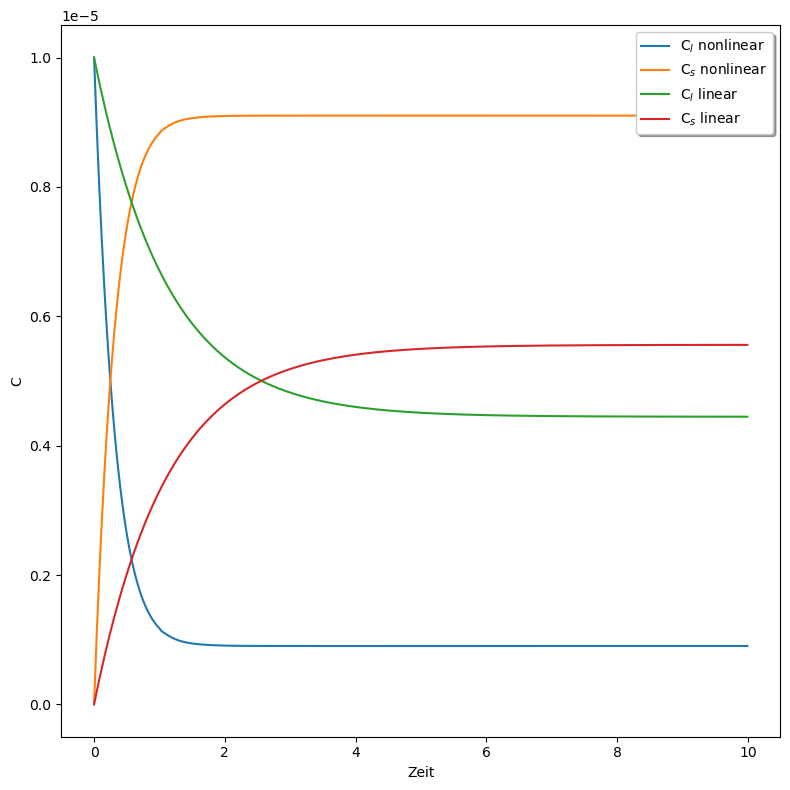

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    Cl, Cs = y      # unpack current values of y
    kf, kb, b, rhob, theta = params  # unpack parameters
    derivs = [-kf*Cl**b + rhob/theta*kb*Cs,      # list of dy/dt=f functions
             kf*theta/rhob*Cl**b - kb*Cs]
    return derivs

# Parameters
kf=0.5; kb=0.4; b=0.85; rhob=1.5; theta=0.3;

# Initial values
Cl0 = 1e-5;     
Cs0 = 1e-9;

# Bundle parameters for ODE solver
params = [kf, kb, b, rhob, theta]

# Bundle initial conditions for ODE solver
y0 = [Cl0, Cs0]

# Make time array for solution
tStop = 10.
tInc = 0.01
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Analytical solution of linear sorption kinetics
Cl_ana = (Cl0*kb+Cs0*kb*rhob/theta) / (kf+kb) + ( (Cl0*kf - Cs0*kb*rhob/theta)/(kf+kb) )*np.exp(-(kf+kb)*t);
Cs_ana = (Cl0*kf*theta/rhob+Cs0*kf) / (kf+kb) + ( (-theta/rhob*Cl0*kf - Cs0*kb)/(kf+kb) )*np.exp(-(kf+kb)*t);

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot as a function of time
plt.plot(t, psoln[:,0],label='C$_l$ nonlinear')
plt.plot(t, psoln[:,1]*rhob/theta,label='C$_s$ nonlinear')
plt.plot(t, Cl_ana,label='C$_l$ linear');
plt.plot(t,Cs_ana*rhob/theta,label='C$_s$ linear');
plt.xlabel('Zeit')
plt.ylabel('C')
plt.legend(loc='upper right', shadow=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.show()


# Beispiel 6

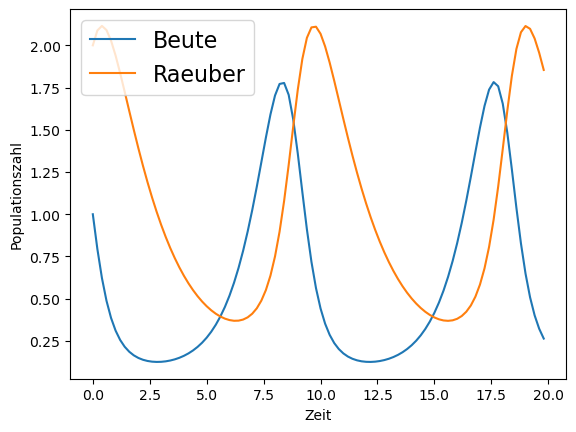

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.font_manager import FontProperties

def f(y, t, params):
    y1, y2 = y
    a, b, c, d = params  # unpack parameters
    deriv = [y1*(a-b*y2),
             y2*(c*y1-d)]
    return deriv

# Parameters
a=1.1; b=1.1; c=0.8; d=0.5;

# Initial values
y0 = [1,
      2];

# Bundle parameters for ODE solver
params = [a, b, c, d ]

# Make time array for solution
tStop = 20.
tInc = 0.2
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure()

# Plot population size as a function of time
#ax1 = fig.add_subplot(211)
plt.plot(t, psoln[:,0],t,psoln[:,1])
plt.xlabel('Zeit')
plt.ylabel('Populationszahl')
plt.legend((r'Beute', r'Raeuber'), prop=FontProperties(size=16))


plt.show()


# Beispiel 7

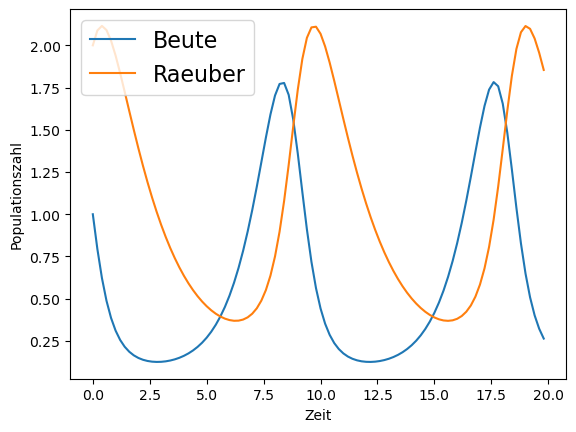

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.font_manager import FontProperties

def f(y, t, params):
    y1, y2 = y
    a, b, c, d = params  # unpack parameters
    deriv = [y1*(a-b*y2),
             y2*(c*y1-d)]
    return deriv

# Parameters
a=1.1; b=1.1; c=0.8; d=0.5;

# Initial values
y0 = [1,
      2];

# Bundle parameters for ODE solver
params = [a, b, c, d ]

# Make time array for solution
tStop = 20.
tInc = 0.2
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure()

# Plot population size as a function of time
#ax1 = fig.add_subplot(211)
plt.plot(t, psoln[:,0],t,psoln[:,1])
plt.xlabel('Zeit')
plt.ylabel('Populationszahl')
plt.legend((r'Beute', r'Raeuber'), prop=FontProperties(size=16))


plt.show()
